# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
# set lists for the dataframe
city_name = []
cloudiness = []
dates = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
countries = []

In [7]:
#Variables to keep track of response number
counter_one = 0
set_one = 1

print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')

#Run the API call for each city
# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        
        if counter_one == 50:
            counter_one = 1
            set_one += 1
            city_name.append(city)
            time.sleep(5)
        else:
            counter_one += 1
            city_name.append(city)
        print(f"Processing Record {counter_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print('''
-----------------------------
Data Retrieval Complete
-----------------------------''')


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ancud
Processing Record 2 of Set 1 | port lincoln
City not found. Skipping...
Processing Record 3 of Set 1 | luderitz
City not found. Skipping...
Processing Record 4 of Set 1 | kupang
Processing Record 5 of Set 1 | albany
City not found. Skipping...
Processing Record 6 of Set 1 | inhambane
City not found. Skipping...
Processing Record 7 of Set 1 | mayo
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | dali
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | khairpur
Processing Record 16 of Set 1 | boende
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | nikolskoye
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | shimoda
City n

Processing Record 27 of Set 4 | bredasdorp
Processing Record 28 of Set 4 | torbay
Processing Record 29 of Set 4 | alice springs
Processing Record 30 of Set 4 | puerto ayora
City not found. Skipping...
Processing Record 31 of Set 4 | san patricio
Processing Record 32 of Set 4 | verkh-usugli
Processing Record 33 of Set 4 | maningrida
Processing Record 34 of Set 4 | geraldton
Processing Record 35 of Set 4 | ilulissat
Processing Record 36 of Set 4 | takoradi
Processing Record 37 of Set 4 | broome
Processing Record 38 of Set 4 | newport
Processing Record 39 of Set 4 | vardo
City not found. Skipping...
Processing Record 40 of Set 4 | vestmanna
Processing Record 41 of Set 4 | kirkenaer
City not found. Skipping...
Processing Record 42 of Set 4 | binzhou
Processing Record 43 of Set 4 | ribeira grande
Processing Record 44 of Set 4 | sinnamary
Processing Record 45 of Set 4 | wanning
Processing Record 46 of Set 4 | marsh harbour
Processing Record 47 of Set 4 | hami
Processing Record 48 of Set 4 | 

Processing Record 12 of Set 8 | havelock
Processing Record 13 of Set 8 | batagay
Processing Record 14 of Set 8 | coruripe
Processing Record 15 of Set 8 | karratha
Processing Record 16 of Set 8 | qorveh
Processing Record 17 of Set 8 | khilok
Processing Record 18 of Set 8 | dhidhdhoo
City not found. Skipping...
Processing Record 19 of Set 8 | asosa
City not found. Skipping...
Processing Record 20 of Set 8 | sept-iles
Processing Record 21 of Set 8 | rio grande
Processing Record 22 of Set 8 | sao filipe
Processing Record 23 of Set 8 | kruszwica
Processing Record 24 of Set 8 | bilma
Processing Record 25 of Set 8 | sebring
Processing Record 26 of Set 8 | kontagora
Processing Record 27 of Set 8 | cozumel
Processing Record 28 of Set 8 | tres arroyos
Processing Record 29 of Set 8 | luangwa
Processing Record 30 of Set 8 | half moon bay
Processing Record 31 of Set 8 | kavaratti
Processing Record 32 of Set 8 | phan rang
Processing Record 33 of Set 8 | nizwa
Processing Record 34 of Set 8 | kita
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Create a dictionary for establishing dataframe
city_dict = {
                "City":city_name,
                "Lat":lat,
                "Lng":lng,
                "Max Temp":max_temp,
                "Humidity":humidity,
                "Cloudiness":cloudiness,
                "Wind Speed":wind_speed,
                "Country":countries,
                "Date":dates,       
            }

city_data_df = pd.DataFrame(city_dict)

# Write and save to CSV
city_data_csv = city_data_df.to_csv('city_data.csv',header = True)

# Display the df
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ancud,-41.8697,-73.8203,42.01,100,20,3.44,CL,1620702783
1,port lincoln,-7.0349,29.7638,67.35,76,50,6.40,CD,1620702783
2,luderitz,-26.6481,15.1594,68.52,41,0,4.21,NA,1620702784
3,kupang,-10.1667,123.5833,87.80,58,20,18.41,ID,1620702784
4,albany,42.6001,-73.9662,51.01,75,87,5.84,US,1620702772


In [36]:
# Create a Summary Statistics Dataframe
numbers = {
                "Lat":lat,
                "Lng":lng,
                "Max Temp":max_temp,
                "Humidity":humidity,
                "Cloudiness":cloudiness,
                "Wind Speed":wind_speed,
                "Date":dates,       
            }

number_stats_df = pd.DataFrame(numbers)
number_stats_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02
mean,23.456390,24.668338,61.840277,71.431734,56.793358,7.615387,1.620703e+09
std,31.996578,86.126978,17.776775,21.108337,38.115712,5.110304,7.782064e+01
min,-54.800000,-175.200000,14.720000,1.000000,0.000000,0.130000,1.620703e+09
25%,-3.415675,-46.029975,47.665000,62.000000,20.000000,3.690000,1.620703e+09
50%,29.228550,29.409850,62.600000,74.500000,73.000000,6.640000,1.620703e+09
75%,50.158425,96.157150,77.575000,88.000000,93.000000,10.360000,1.620703e+09
max,78.218600,179.316700,96.010000,100.000000,100.000000,30.330000,1.620703e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

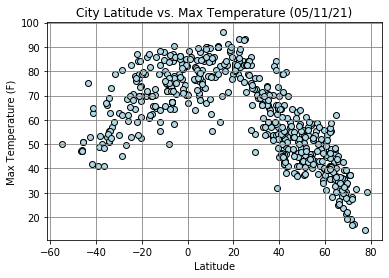

In [59]:
# Create a scatter plot of Latitude vs Max Temp
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="lightblue",alpha=1)
plt.title("City Latitude vs. Max Temperature (05/11/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
# plt.savefig("../Images/latvsmaxtemp.png")
plt.show()

## Latitude vs. Humidity Plot

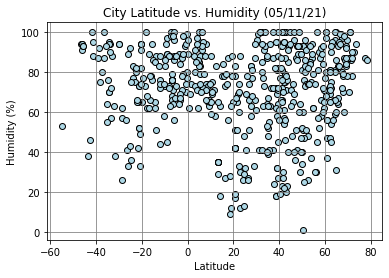

In [56]:
# Create a scatter plot of Latitude vs Humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="lightblue",alpha=1)
plt.title("City Latitude vs. Humidity (05/11/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
# plt.savefig("../Images/latvshumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

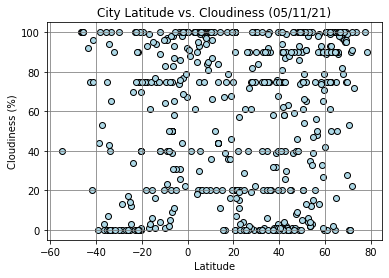

In [61]:
# Create a scatter plot of Latitude vs Cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="lightblue",alpha=1)
plt.title("City Latitude vs. Cloudiness (05/11/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
# plt.savefig("../Images/latvscloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

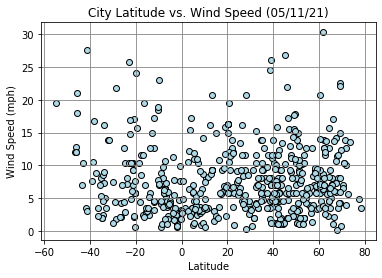

In [62]:
# Create a scatter plot of Latitude vs Wind Speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="lightblue",alpha=1)
plt.title("City Latitude vs. Wind Speed (05/11/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
# plt.savefig("../Images/latvswindspeed.png")
plt.show()

## Linear Regression

In [82]:
# Define the variables for cities in the Northern and Southern Hemispheres
northern_hem = city_data_df.loc[city_data_df["Lat"] >= 0.0]
northern_hem.reset_index(inplace=True)

southern_hem = city_data_df.loc[city_data_df["Lat"] < 0.0]
southern_hem.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7478621172641848


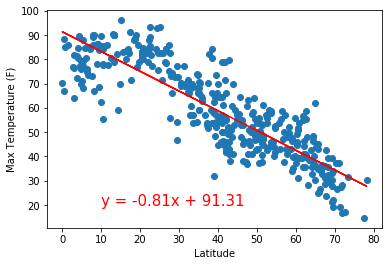

In [86]:
# Linear Regression equation and Print out the r-squared value along with the plot.
x_values = northern_hem["Lat"]
y_values = northern_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.44335045901489467


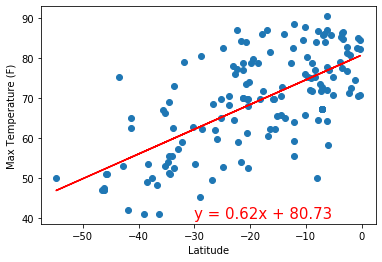

In [89]:
# Linear Regression equation and Print out the r-squared value along with the plot.
x_values = southern_hem["Lat"]
y_values = southern_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.023277345026436476


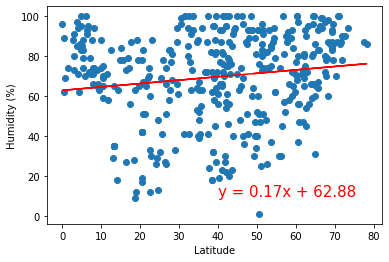

In [93]:
# Linear Regression equation and Print out the r-squared value along with the plot.
x_values = northern_hem["Lat"]
y_values = northern_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0032576419622957096


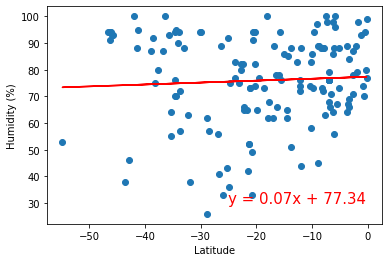

In [96]:
# Linear Regression equation and Print out the r-squared value along with the plot.
x_values = southern_hem["Lat"]
y_values = southern_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00687757303868429


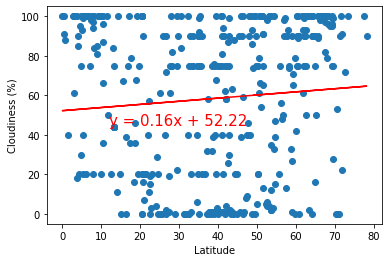

In [100]:
# Linear Regression equation and Print out the r-squared value along with the plot.
x_values = northern_hem["Lat"]
y_values = northern_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12,45),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0097093493844142


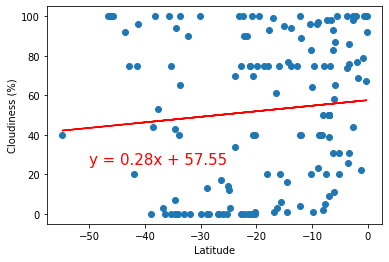

In [103]:
# Linear Regression equation and Print out the r-squared value along with the plot.
x_values = southern_hem["Lat"]
y_values = southern_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0051314947847614385


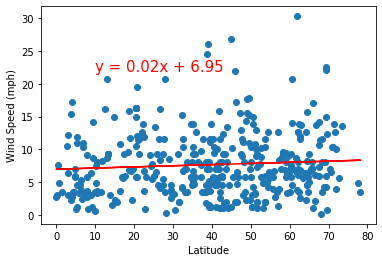

In [106]:
# Linear Regression equation and Print out the r-squared value along with the plot.
x_values = northern_hem["Lat"]
y_values = northern_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,22),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10892692932909565


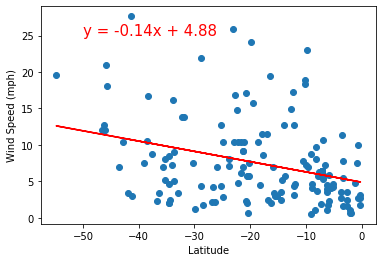

In [108]:
# Linear Regression equation and Print out the r-squared value along with the plot.
x_values = southern_hem["Lat"]
y_values = southern_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()